CSC 578 Section 701 Final Project
====================
Time Series Analysis with Recurrent Neural Networks
====================

By: Guy Dor
---------------------
---

Contents:
----
* **Introduction**

* **Exploratory Data Analysis**

    - **Data Visualizations**


* **Data Preparation**

* **Preprocessing**

* **Model Specification**

* **Model Training**

* **Estimation and Prediction**

Introduction
--------------
The primary purpose of this project is to perform an analysis to construct a prediction model using some kind of neural network. The dataset is hourly weather measurements, and the specific measure we want to predict is temperature in degrees Celsius.


To start off, we have to import the necessary packages. I used the following libraries:
- pandas
- numpy
- matplotlib
- seaborn
- tensorflow
- keras
- sklearn


I also used the magic matplotlib function to allow us to see plots within the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.preprocessing import Imputer

%matplotlib inline

Using TensorFlow backend.


Then, I imported data as a pandas dataframe and conduct some initial exploratory analysis.



In [2]:
df=pd.read_csv('climate_hour.csv', header=0, index_col=0)

Exploratory Data Analysis
---------

Let's first take a look at the data. We can see that the data is in order hourly, and each hour there are 14 measures we need to analyze.

In [3]:
df.head()

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78    94.4   
01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
01.01.2009 03:00:00    996.84     -8.81    264.59        -9.66    93.5   
01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02    92.6   
01.01.2009 05:00:00    997.46     -9.63    263.72       -10.65    92.2   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
01.01.2009 01:00:00          3.33          3.14          0.19       1.96   
01.01.2009 02:00:00          3.12          2.90          0.21       1.81   
01.01.2009 03:00:00          3.13          2.93          0.20       1.83   
01.01.2009 04:00:00          3.07          2.85          0.23       1.78   
01.01.2009 05:00:00          2.94          2.71          0.23       1.69   

                     H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  \
Date Time                                                                     
01.01.2009 01:00:00             3.15       1307.86      0.21           0.63   
01.01.2009 02:00:00             2.91       1312.25      0.25           0.63   
01.01.2009 03:00:00             2.94       1312.18      0.18           0.63   
01.01.2009 04:00:00             2.85       1313.61      0.10           0.38   
01.01.2009 05:00:00             2.71       1317.19      0.40           0.88   

                     wd (deg)  
Date Time                      
01.01.2009 01:00:00     192.7  
01.01.2009 02:00:00     190.3  
01.01.2009 03:00:00     167.2  
01.01.2009 04:00:00     240.0  
01.01.2009 05:00:00     157.0

---

To get some more summary statistics, we call the describe() function.

In [4]:
df.describe()

p (mbar)      T (degC)      Tpot (K)   Tdew (degC)        rh (%)  \
count  70037.000000  70037.000000  70037.000000  70037.000000  70037.000000   
mean     989.214407      9.441694    283.484141      4.953132     76.029050   
std        8.360583      8.420257      8.501338      6.731520     16.457667   
min      918.500000    -22.760000    250.850000    -24.800000     13.060000   
25%      984.200000      3.350000    277.430000      0.230000     65.290000   
50%      989.580000      9.410000    283.460000      5.210000     79.300000   
75%      994.730000     15.460000    289.510000     10.070000     89.500000   
max     1015.290000     37.280000    311.210000     22.940000    100.000000   

       VPmax (mbar)  VPact (mbar)  VPdef (mbar)     sh (g/kg)  \
count  70037.000000  70037.000000  70037.000000  70037.000000   
mean      13.567671      9.532164      4.035420      6.021406   
std        7.734023      4.184210      4.890396      2.656194   
min        0.970000      0.810000      0.000000      0.510000   
25%        7.770000      6.210000      0.870000      3.920000   
50%       11.820000      8.860000      2.180000      5.590000   
75%       17.590000     12.350000      5.290000      7.800000   
max       63.770000     28.040000     46.010000     17.940000   

       H2OC (mmol/mol)  rho (g/m**3)      wv (m/s)  max. wv (m/s)  \
count     70037.000000  70037.000000  70037.000000   70037.000000   
mean          9.638610   1216.101047      2.130113       3.532894   
std           4.235455     39.964559      1.538667       2.336281   
min           0.810000   1066.190000      0.000000       0.000000   
25%           6.290000   1187.560000      0.990000       1.760000   
50%           8.960000   1213.850000      1.760000       2.960000   
75%          12.480000   1242.850000      2.860000       4.730000   
max          28.530000   1392.560000     12.580000      20.330000   

           wd (deg)  
count  70037.000000  
mean     174.943301  
std       86.619521  
min        0.000000  
25%      125.500000  
50%      198.400000  
75%      234.300000  
max      360.000000

Each of these measures has very distinct distributions and probably will need to be rescaled later on. For now, though we will want to also understand the time functionality of each measure.

---

Data Visualizations
----
To get a more visual understanding of the distribution of the time series data, we design a plot below:



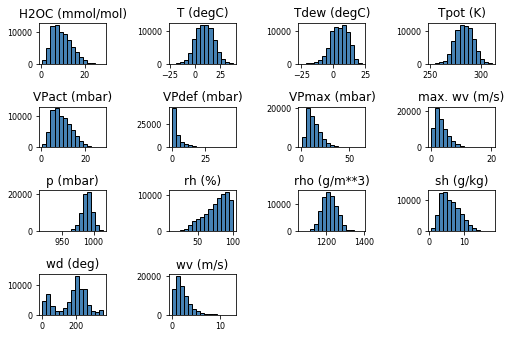

In [5]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

We can clearly see by the histograms that while temperature looks like a normal distribution, some of the data has very strong skewness, kurtosis, and even a bimodal distribution from looking at wd (deg).

Next, let's visualize the data throughout time:

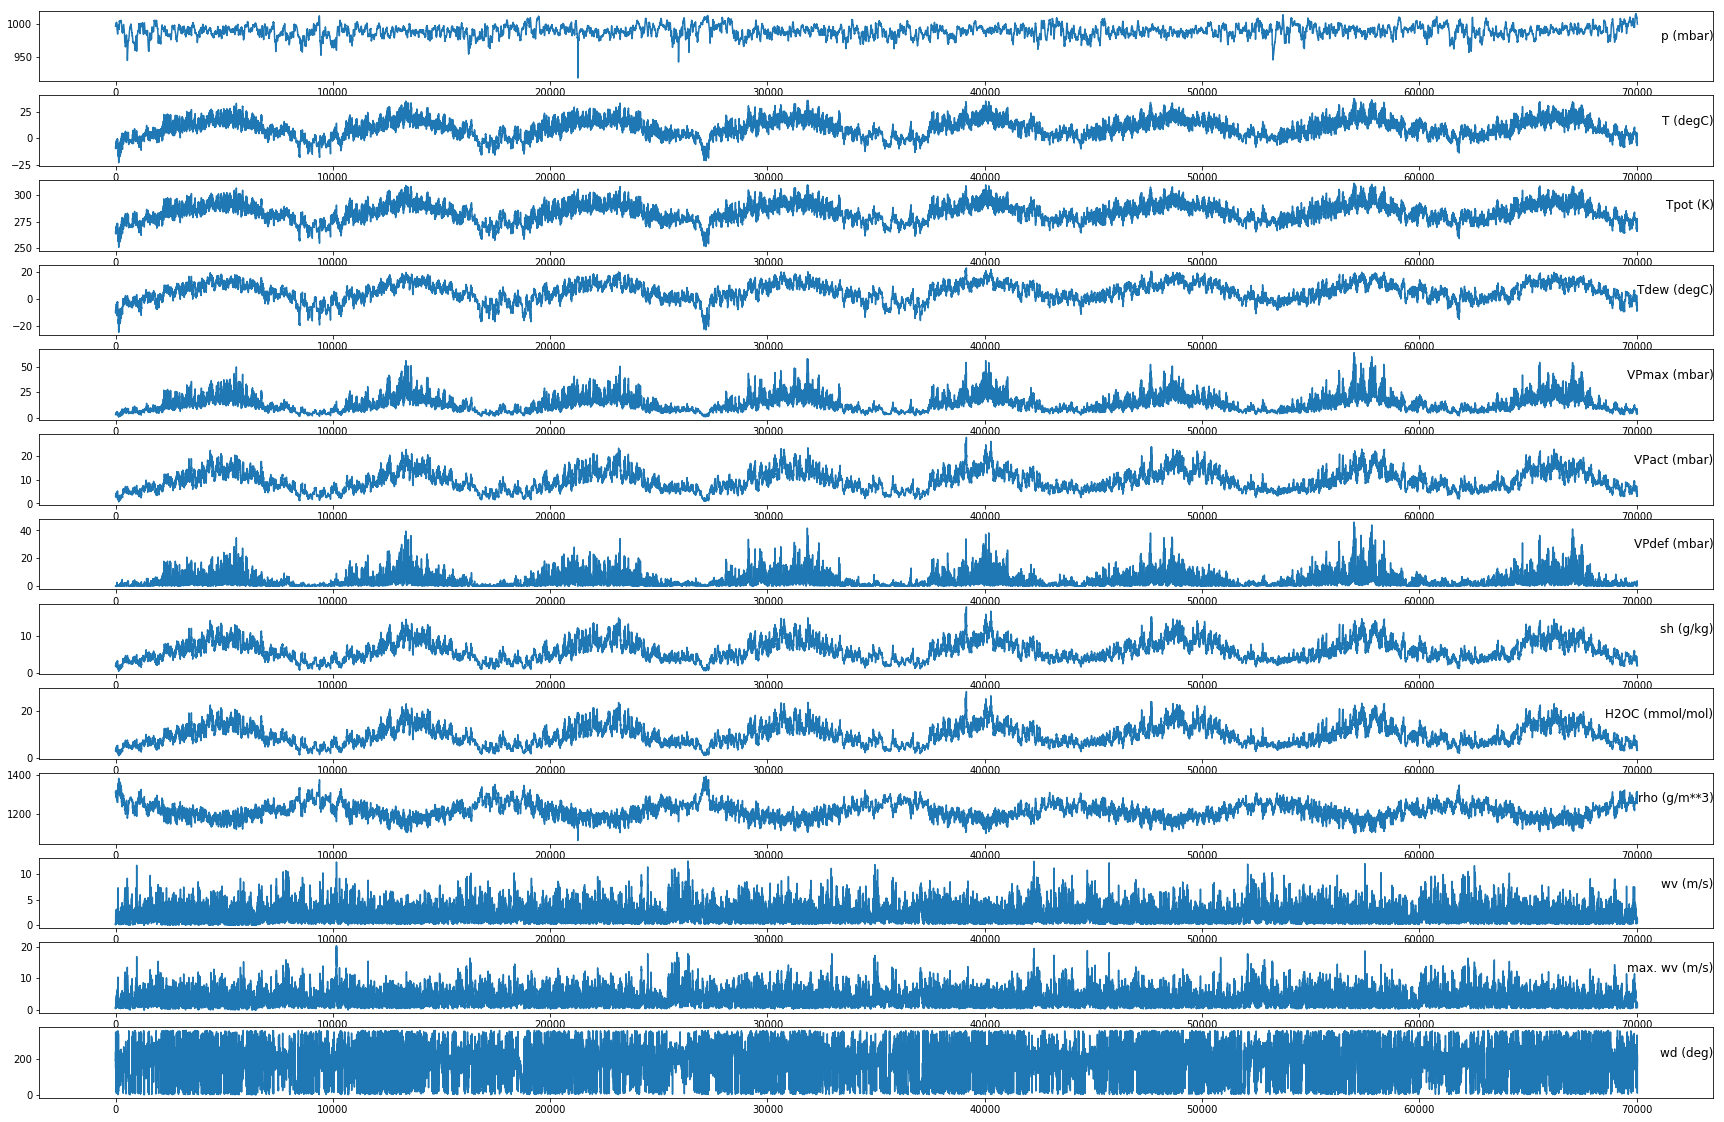

In [6]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7,8,9,10,11,12,13]
i = 1
# plot each column
plt.figure(figsize=(30,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=.5, loc='right')
    i += 1
plt.show()

Interesting! Many of the variables move together very similarly throughout time. Lets see how correlated these variables are:

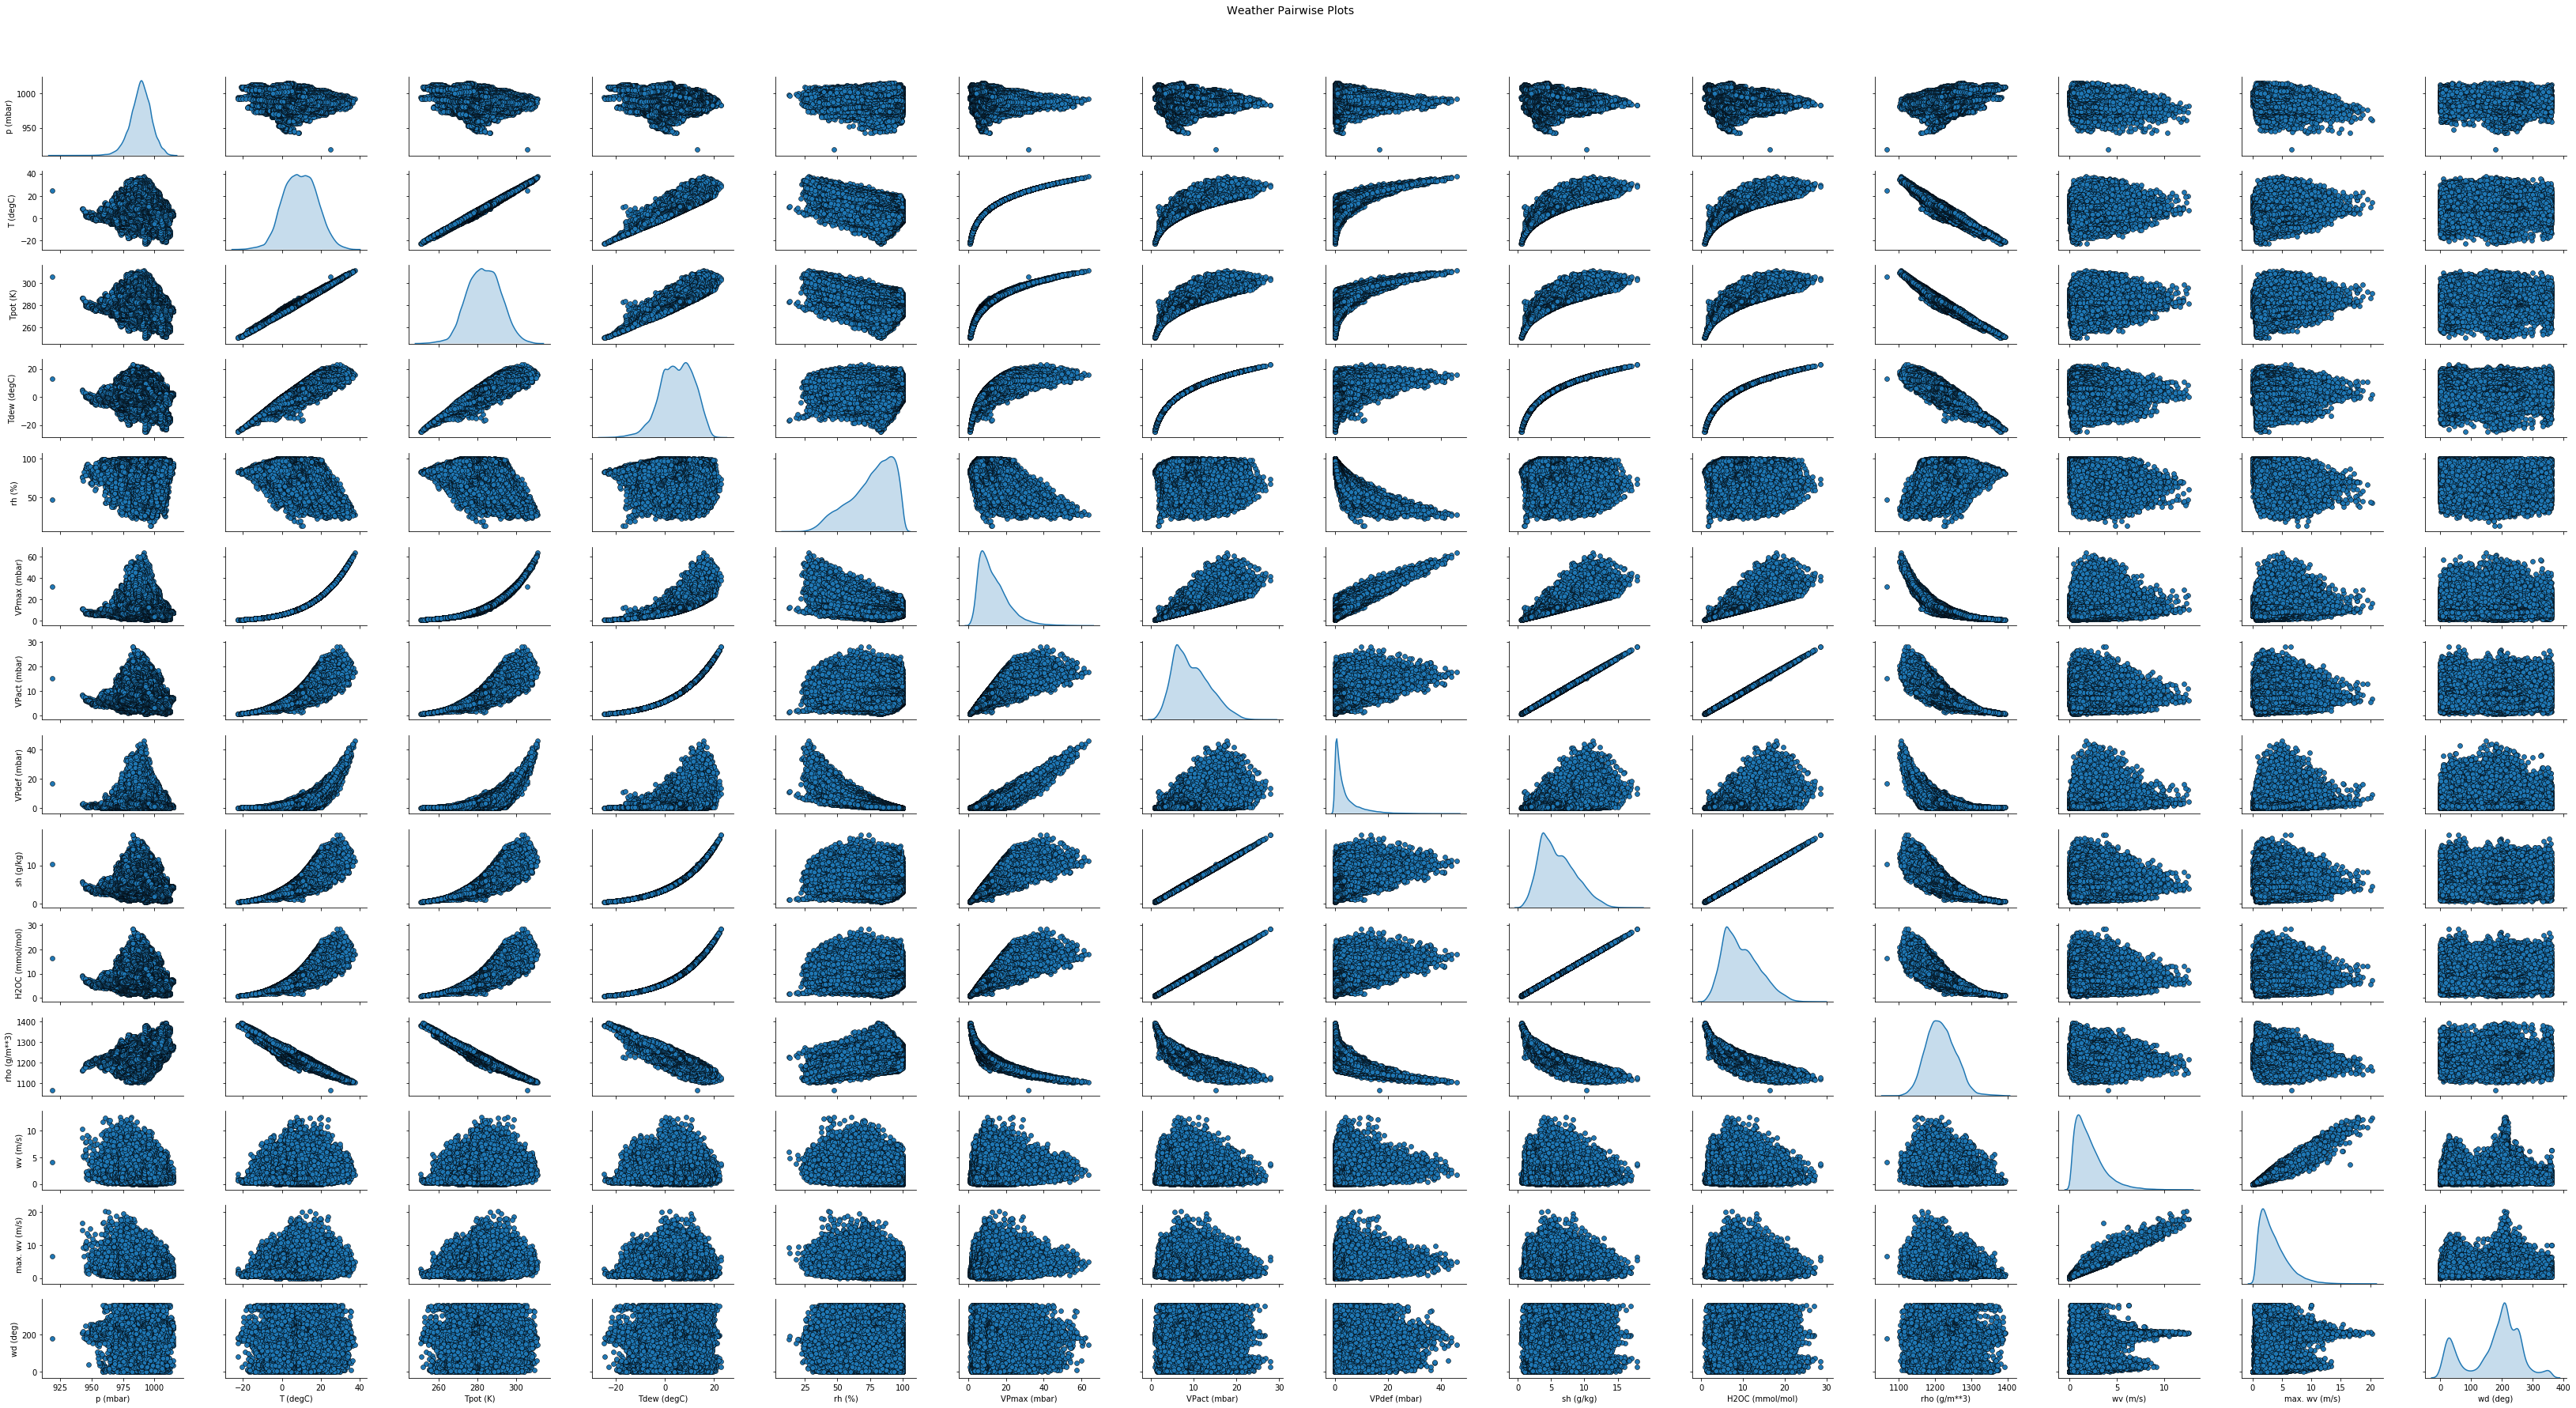

In [7]:
pp = sns.pairplot(df, size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Weather Pairwise Plots', fontsize=14)
plt.show()

We can very easily see that there are some definite linear and nonlinear correlations among these variables, which will very likely help the model in training.

---

Data Preparation
-----

Since we know that we need to perform some data preprocessing of the time series, We would first want to construct a function to pivot the data into a shape that can be correctly fed into the model we want to construct.

In [7]:
def restructure(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # setting up the input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # setting up the forecasting sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # concatenate all the columns
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

Let's now create a new dataset for preprocessing:

In [8]:
dataset = pd.read_csv('climate_hour.csv', header=0, index_col=0)
dataset.head()

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78    94.4   
01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
01.01.2009 03:00:00    996.84     -8.81    264.59        -9.66    93.5   
01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02    92.6   
01.01.2009 05:00:00    997.46     -9.63    263.72       -10.65    92.2   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
01.01.2009 01:00:00          3.33          3.14          0.19       1.96   
01.01.2009 02:00:00          3.12          2.90          0.21       1.81   
01.01.2009 03:00:00          3.13          2.93          0.20       1.83   
01.01.2009 04:00:00          3.07          2.85          0.23       1.78   
01.01.2009 05:00:00          2.94          2.71          0.23       1.69   

                     H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  \
Date Time                                                                     
01.01.2009 01:00:00             3.15       1307.86      0.21           0.63   
01.01.2009 02:00:00             2.91       1312.25      0.25           0.63   
01.01.2009 03:00:00             2.94       1312.18      0.18           0.63   
01.01.2009 04:00:00             2.85       1313.61      0.10           0.38   
01.01.2009 05:00:00             2.71       1317.19      0.40           0.88   

                     wd (deg)  
Date Time                      
01.01.2009 01:00:00     192.7  
01.01.2009 02:00:00     190.3  
01.01.2009 03:00:00     167.2  
01.01.2009 04:00:00     240.0  
01.01.2009 05:00:00     157.0

---

Since we want the model to predict 'T (degC)', We first will move the column to the front of the dataframe:

In [9]:
cols = list(dataset)
cols.insert(0, cols.pop(cols.index('T (degC)')))
dataset = dataset.ix[:, cols]
dataset.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


T (degC)  p (mbar)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
01.01.2009 01:00:00     -8.05    996.50    265.38        -8.78    94.4   
01.01.2009 02:00:00     -8.88    996.62    264.54        -9.77    93.2   
01.01.2009 03:00:00     -8.81    996.84    264.59        -9.66    93.5   
01.01.2009 04:00:00     -9.05    996.99    264.34       -10.02    92.6   
01.01.2009 05:00:00     -9.63    997.46    263.72       -10.65    92.2   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
01.01.2009 01:00:00          3.33          3.14          0.19       1.96   
01.01.2009 02:00:00          3.12          2.90          0.21       1.81   
01.01.2009 03:00:00          3.13          2.93          0.20       1.83   
01.01.2009 04:00:00          3.07          2.85          0.23       1.78   
01.01.2009 05:00:00          2.94          2.71          0.23       1.69   

                     H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  \
Date Time                                                                     
01.01.2009 01:00:00             3.15       1307.86      0.21           0.63   
01.01.2009 02:00:00             2.91       1312.25      0.25           0.63   
01.01.2009 03:00:00             2.94       1312.18      0.18           0.63   
01.01.2009 04:00:00             2.85       1313.61      0.10           0.38   
01.01.2009 05:00:00             2.71       1317.19      0.40           0.88   

                     wd (deg)  
Date Time                      
01.01.2009 01:00:00     192.7  
01.01.2009 02:00:00     190.3  
01.01.2009 03:00:00     167.2  
01.01.2009 04:00:00     240.0  
01.01.2009 05:00:00     157.0

---

Preprocessing
------------

To manipulate this data further, we will need to create a numpy array:

In [10]:
values = dataset.values
values

array([[-8.05000e+00,  9.96500e+02,  2.65380e+02, ...,  2.10000e-01,
         6.30000e-01,  1.92700e+02],
       [-8.88000e+00,  9.96620e+02,  2.64540e+02, ...,  2.50000e-01,
         6.30000e-01,  1.90300e+02],
       [-8.81000e+00,  9.96840e+02,  2.64590e+02, ...,  1.80000e-01,
         6.30000e-01,  1.67200e+02],
       ...,
       [-2.59000e+00,  1.00070e+03,  2.70510e+02, ...,  3.80000e-01,
         7.20000e-01,  8.15000e+00],
       [-3.76000e+00,  1.00021e+03,  2.69390e+02, ...,  8.90000e-01,
         1.30000e+00,  2.23700e+02],
       [-4.82000e+00,  9.99820e+02,  2.68360e+02, ...,  1.23000e+00,
         1.96000e+00,  1.84900e+02]])

---

Next we encode the 14 features

In [11]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
values[:,13] = encoder.fit_transform(values[:,13])

We need to make sure that all the data is in float type:

In [12]:
values = values.astype('float32')

Then we scale the data using the MinMax method, setting data from 0 to 1.

In [13]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

Model specification must know how the data is going to be shaped. In this case, the time series data is shaped for 24 hour increments of 14 features.

In [14]:
n_hours = 24
n_features = 14

We now implement our function to reframe the data to fit the model being fed.

In [15]:
reframed = restructure(scaled, n_hours, 1)
print(reframed.shape)

(70013, 350)


---

We split the data into training and testing sets, Training ends a 52542 hours, and testing starts after to perform the right prediction length.

In [16]:
values = reframed.values
n_train_hours = 52542
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

After splitting, we generate the x, and y sets for modeling and prediction.

In [17]:
n_obs = n_hours * n_features
x_train, y_train = train[:, :n_obs], train[:, -n_features]
x_test, y_test = test[:, :n_obs], test[:, -n_features]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(52542, 336) (52542,) (17471, 336) (17471,)


---

We must also reshape these sets to represent the time frames and features.

In [18]:
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], n_hours, n_features))
x_test = x_test.reshape((x_test.shape[0], n_hours, n_features))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(52542, 24, 14) (52542,) (17471, 24, 14) (17471,)


---

We can get a preview of how our data now looks, reshaped and rescaled.

In [19]:
# x_train 
print (x_train[:3]) # first row is from 01.01.2009 01:00:00 to 02.01.2009 00:00:00 (both inclusive)
print (x_train[-3:]) # last row is from 30.12.2014 23:00:00 to 31.12.2014 22:00:00 (both inclusive)

[[[0.24500331 0.80586815 0.24072266 ... 0.01669316 0.03098869 0.8069565 ]
  [0.2311792  0.8071079  0.22680616 ... 0.01987281 0.03098869 0.8041739 ]
  [0.23234507 0.8093815  0.22763443 ... 0.01430843 0.03098869 0.7773913 ]
  ...
  [0.30413055 0.8420296  0.29506302 ... 0.02623212 0.03098869 0.78724635]
  [0.30463022 0.839653   0.29589128 ... 0.05166931 0.04918839 0.8377971 ]
  [0.30346435 0.83779335 0.29489708 ... 0.03259141 0.04328578 0.76324636]]

 [[0.2311792  0.8071079  0.22680616 ... 0.01987281 0.03098869 0.8041739 ]
  [0.23234507 0.8093815  0.22763443 ... 0.01430843 0.03098869 0.7773913 ]
  [0.22834775 0.8109312  0.22349215 ... 0.00794913 0.01869159 0.8617971 ]
  ...
  [0.30463022 0.839653   0.29589128 ... 0.05166931 0.04918839 0.8377971 ]
  [0.30346435 0.83779335 0.29489708 ... 0.03259141 0.04328578 0.76324636]
  [0.3051299  0.8352108  0.296885   ... 0.02225755 0.04918839 0.75524634]]

 [[0.23234507 0.8093815  0.22763443 ... 0.01430843 0.03098869 0.7773913 ]
  [0.22834775 0.810931

In [20]:
# x_test
print (x_test[:3]) # first row is from 31.12.2014 00:00:00 to 31.12.2014 23:00:00 (both inclusive)
print (x_test[-3:]) # last row is from 31.12.2016 00:00:00 to 31.12.2016 23:00:00 (both inclusive)

[[[0.4045636  0.889554   0.388999   ... 0.16852146 0.17068371 0.8857971 ]
  [0.40289804 0.8866615  0.38767385 ... 0.22972974 0.20216429 0.87489855]
  [0.40556294 0.88604164 0.39032507 ... 0.2329094  0.21495326 0.8815072 ]
  ...
  [0.4117255  0.9111481  0.39347267 ... 0.05325915 0.07673389 0.752     ]
  [0.4113924  0.9135237  0.39280987 ... 0.05643879 0.0885391  0.7337971 ]
  [0.41538972 0.9154873  0.3964548  ... 0.02782194 0.04230202 0.7467826 ]]

 [[0.40289804 0.8866615  0.38767385 ... 0.22972974 0.20216429 0.87489855]
  [0.40556294 0.88604164 0.39032507 ... 0.2329094  0.21495326 0.8815072 ]
  [0.4015656  0.88531876 0.3865142  ... 0.15659778 0.12395474 0.8687536 ]
  ...
  [0.4113924  0.9135237  0.39280987 ... 0.05643879 0.0885391  0.7337971 ]
  [0.41538972 0.9154873  0.3964548  ... 0.02782194 0.04230202 0.7467826 ]
  [0.41339105 0.9163141  0.39430094 ... 0.03259141 0.04525332 0.9009855 ]]

 [[0.40556294 0.88604164 0.39032507 ... 0.2329094  0.21495326 0.8815072 ]
  [0.4015656  0.885318

In [21]:
# y_train
print (y_train[:3]) # first row is 02.01.2009 01:00:00
print (y_train[-3:]) # last row is 31.12.2014 23:00:00

[0.3051299  0.3076282  0.30496335]
[0.4117255  0.4113924  0.41538972]


In [22]:
# y_test
print (y_test[:3]) # first row is 01.01.2015 00:00:00
print (y_test[-3:]) # last row is 01.01.2017 00:00:00

[0.41339105 0.41605595 0.41305795]
[0.3359427  0.31645566 0.29880077]


---

Model Specification
------
I first want to construct a new "accuracy" metric to use for this model. Since this is essentially a regression problem and not classification, I decided to go with using R^2.

In [23]:
from keras import backend as K

def RSquared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

After many experiments with adjusting layers and batch sizes, I decided to use 1 initial LSTM Layer of 240 nodes, using no Dropout.

In [24]:
model1 = keras.Sequential()
model1.add(keras.layers.LSTM(240, input_shape=(x_train.shape[1], x_train.shape[2]))) #originally 6 nodes with return_sequences=True
# model1.add(keras.layers.LSTM(6))
# model1.add(keras.layers.Dense(240))
# model1.add(keras.layers.Activation('relu'))
# model1.add(keras.layers.RepeatVector(24))
# model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(1))
model1.compile(loss='mae', optimizer='adam', metrics=[RSquared])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 240)               244800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 241       
Total params: 245,041
Trainable params: 245,041
Non-trainable params: 0
_________________________________________________________________
None


Is applying no regularization risky of overfitting? Let's see!

---

Model Training
--------

Once compiled, we train the model on 50 epochs with a batch size of 240.

In [25]:
history = model1.fit(x_train, y_train, epochs=50, batch_size=240, validation_data=(x_test, y_test), verbose=2 ,shuffle=False)

Train on 52542 samples, validate on 17471 samples
Epoch 1/50
 - 41s - loss: 0.0437 - RSquared: -7.1052e-02 - val_loss: 0.0439 - val_RSquared: 0.4554
Epoch 2/50
 - 39s - loss: 0.0214 - RSquared: 0.8152 - val_loss: 0.0328 - val_RSquared: 0.6867
Epoch 3/50
 - 37s - loss: 0.0139 - RSquared: 0.9174 - val_loss: 0.0110 - val_RSquared: 0.9445
Epoch 4/50
 - 36s - loss: 0.0117 - RSquared: 0.9416 - val_loss: 0.0148 - val_RSquared: 0.9214
Epoch 5/50
 - 35s - loss: 0.0108 - RSquared: 0.9491 - val_loss: 0.0104 - val_RSquared: 0.9530
Epoch 6/50
 - 35s - loss: 0.0103 - RSquared: 0.9530 - val_loss: 0.0177 - val_RSquared: 0.8982
Epoch 7/50
 - 35s - loss: 0.0104 - RSquared: 0.9527 - val_loss: 0.0092 - val_RSquared: 0.9618
Epoch 8/50
 - 35s - loss: 0.0095 - RSquared: 0.9583 - val_loss: 0.0090 - val_RSquared: 0.9631
Epoch 9/50
 - 35s - loss: 0.0101 - RSquared: 0.9547 - val_loss: 0.0089 - val_RSquared: 0.9616
Epoch 10/50
 - 34s - loss: 0.0097 - RSquared: 0.9572 - val_loss: 0.0140 - val_RSquared: 0.9284
Epoc

---

An R^2 of about 96% and a test MAE of .008. that's really good! Let's visualize the learning history:

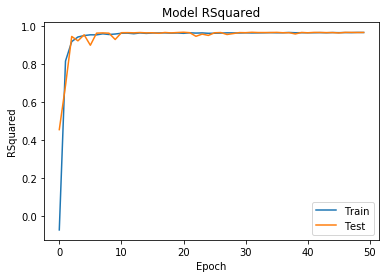

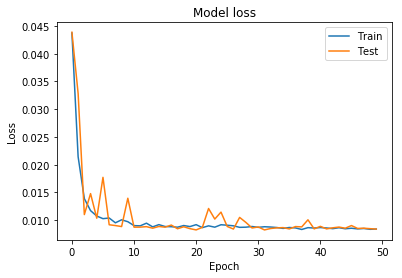

In [26]:
plt.plot(history.history['RSquared'])
plt.plot(history.history['val_RSquared'])
plt.title('Model RSquared')
plt.ylabel('RSquared')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

The model seemed to learn quite quickly! And barely any signs of overfitting.


---

Estimation & Prediction
------
Now let's used this trained model to output predicted values of the test variables:

In [27]:
yhat = model1.predict(x_test)
x_test = x_test.reshape((x_test.shape[0], n_hours*n_features))

We have to remember to also scale the data back into its original values:

In [28]:
inv_yhat = np.concatenate((yhat, x_test[:, -13:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [29]:
inv_yhat

array([ 2.352164 ,  2.0798242,  2.3054032, ..., -3.7982283, -2.7163842,
       -4.0467734], dtype=float32)

Let's also scale back the actual values just to get a glimpse of how close we are.

In [30]:
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, x_test[:, -13:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [31]:
inv_y

array([ 2.0600002,  2.2200003,  2.0400007, ..., -2.5900002, -3.760001 ,
       -4.820001 ], dtype=float32)

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(inv_y, inv_yhat)

0.5045343

And finally, we output our results into a .csv!

In [33]:
predictions = pd.read_csv('sample_submission.csv', header=0, index_col=0)
predictions['temperature']=inv_yhat
predictions.to_csv('predictions.csv')

We can also plot our predictions and compare them to the actual data.

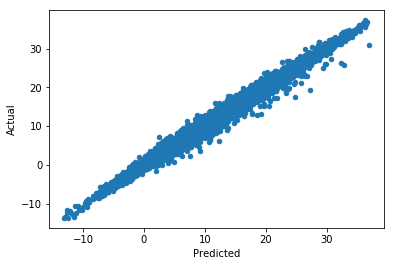

In [34]:
predictact= pd.read_csv('sample_submission.csv', header=0, index_col=0)
predictact['temperature'] = inv_yhat
predictact['Actual']=inv_y
predictact.columns=['Predicted', 'Actual']

predictact.plot.scatter(x='Predicted', y='Actual')
plt.show()

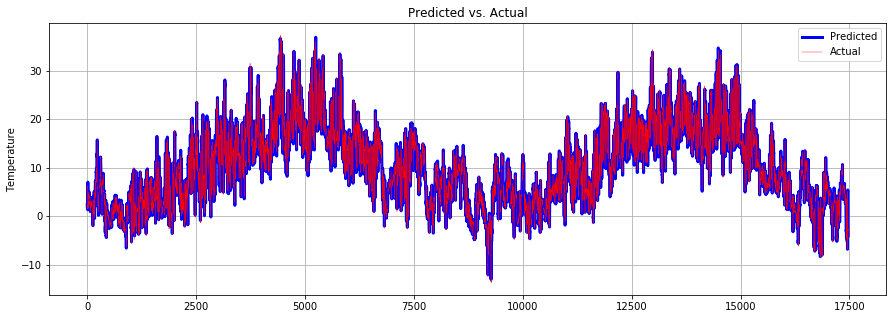

In [35]:
values = predictact.values

# plot each column
plt.figure(figsize=(15,5))

plt.plot(values[:, 0], color='blue',linewidth=3.0)
plt.plot(values[:, 1], color='red', linewidth=0.4)
plt.title('Predicted vs. Actual')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend(['Predicted', 'Actual'], loc='upper right')
plt.show()

Looks like we have a pretty decent forecast!